In [1]:
import numpy as np
import os
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import sys

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['text.usetex'] = True

In [2]:
def execute_process(exe):
    p = sp.Popen(exe, stdout=sp.PIPE, stderr=sp.PIPE)
    stdout, stderr = p.communicate()
    return stderr.decode("utf-8").split("\n")

def get_segs(place):
    temp2 = execute_process(["./getFacets", place])
    segs = []
    skip = False
    temp2 = list(filter(None, temp2))
    for n1 in range(len(temp2)):
        temp3 = temp2[n1].split(" ")
        if not skip:
            temp4 = temp2[n1+1].split(" ")
            x1, y1 = map(float, [temp3[0], temp3[1]])
            x2, y2 = map(float, [temp4[0], temp4[1]])
            segs.extend([((x1, y1),(x2, y2))])
            segs.extend([((x1, -y1),(x2, -y2))])
            skip = True
        else:
            skip = False
    return segs

def get_field_values(place, xmin, xmax, ymin, ymax, ny):
    temp2 = list(filter(None, execute_process(["./getData", place, str(xmin), str(ymin), str(xmax), str(ymax), str(ny)])))
    data = np.array([line.split() for line in temp2], dtype=float)
    nx = data.shape[0] // ny
    X = data[:,0].reshape((nx, ny)).transpose()
    Y = data[:,1].reshape((nx, ny)).transpose()
    T = data[:,2].reshape((nx, ny)).transpose()
    return X, Y, T, nx

def plot_graphics(t, name, xmin, xmax, ymin, ymax, segs, T):

    fig, ax = plt.subplots()
    fig.set_size_inches(19.20, 10.80)
    rect = matplotlib.patches.Rectangle((xmin, -ymax), xmax-xmin, 2*ymax, linewidth=2, edgecolor='k', facecolor='none')
    ax.add_patch(rect)
    line_segments = LineCollection(segs, linewidths=4, colors='green', linestyle='solid')
    ax.add_collection(line_segments)

    ax.imshow(T, cmap="coolwarm", interpolation='Bilinear', origin='lower', extent= [xmin, xmax, ymin, ymax], vmax = 1.0, vmin = -1.0)
    ax.imshow(T, cmap="coolwarm", interpolation='Bilinear', origin='lower', extent= [xmin, xmax, -ymin, -ymax], vmax = 1.0, vmin = -1.0)

    ax.set_aspect('equal')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(-ymax, ymax)

    ax.set_title(r"$t = %5.4f$" % t, fontsize=20)
    ax.axis('off')        

    plt.savefig(name, bbox_inches='tight', dpi=300)
    plt.close()

In [ ]:
L0, ny = 4e0, 512
xmin, xmax, ymin, ymax = -L0/2., L0/2., 0., 1.05
lw = 2
folder = 'Video'
os.makedirs(folder,exist_ok=True)

for ti in range(0, 500):
    t = ti*0.01
    place = f"phaseSeparation/intermediate/snapshot-{t:5.4f}"
    name = f"{folder}/{int(t*1000):08d}.png"
    if not os.path.exists(place):
        print(f"{place} File not found!")
        continue
    elif os.path.exists(name):
        print(f"{name} Image present!")
        continue    
    segs = get_segs(place)
    X, Y, T, nz = get_field_values(place, xmin, xmax, ymin, ymax, ny)
    plot_graphics(t, name, xmin, xmax, ymin, ymax, segs, T)
    print(f"{name} Image created!")
# t = 0.49
# place = f"phaseSeparation/intermediate/snapshot-{t:5.4f}"
# name = f"{folder}/{int(t*1000):08d}.png"
# segs = get_segs(place)
# X, Y, T, nz = get_field_values(place, xmin, xmax, ymin, ymax, ny)

# plot_graphics(t, "test.pdf", xmin, xmax, ymin, ymax, segs, T)

In [ ]:
L0, ny = 4e0, 2048
xmin, xmax, ymin, ymax = -L0/2., L0/2., 0., 1.05
lw = 2
# for ti in range(0, 500):
for t in [0.05, 0.15, 0.25, 0.40]:
    # t = ti*0.01
    place = f"phaseSeparation/intermediate/snapshot-{t:5.4f}"
    name = f"{int(t*1000):08d}.pdf"
    if not os.path.exists(place):
        print(f"{place} File not found!")
        continue
    elif os.path.exists(name):
        print(f"{name} Image present!")
        continue    
    segs = get_segs(place)
    X, Y, T, nz = get_field_values(place, xmin, xmax, ymin, ymax, ny)
    plot_graphics(t, name, xmin, xmax, ymin, ymax, segs, T)
    print(f"{name} Image created!")
# t = 0.49
# place = f"phaseSeparation/intermediate/snapshot-{t:5.4f}"
# name = f"{folder}/{int(t*1000):08d}.png"
# segs = get_segs(place)
# X, Y, T, nz = get_field_values(place, xmin, xmax, ymin, ymax, ny)

# plot_graphics(t, "test.pdf", xmin, xmax, ymin, ymax, segs, T)

Video_v2/00000000.png Image present!
Video_v2/00000001.png Image created!
Video_v2/00000002.png Image created!
Video_v2/00000003.png Image created!
Video_v2/00000004.png Image created!
Video_v2/00000005.png Image created!
Video_v2/00000006.png Image created!


KeyboardInterrupt: 

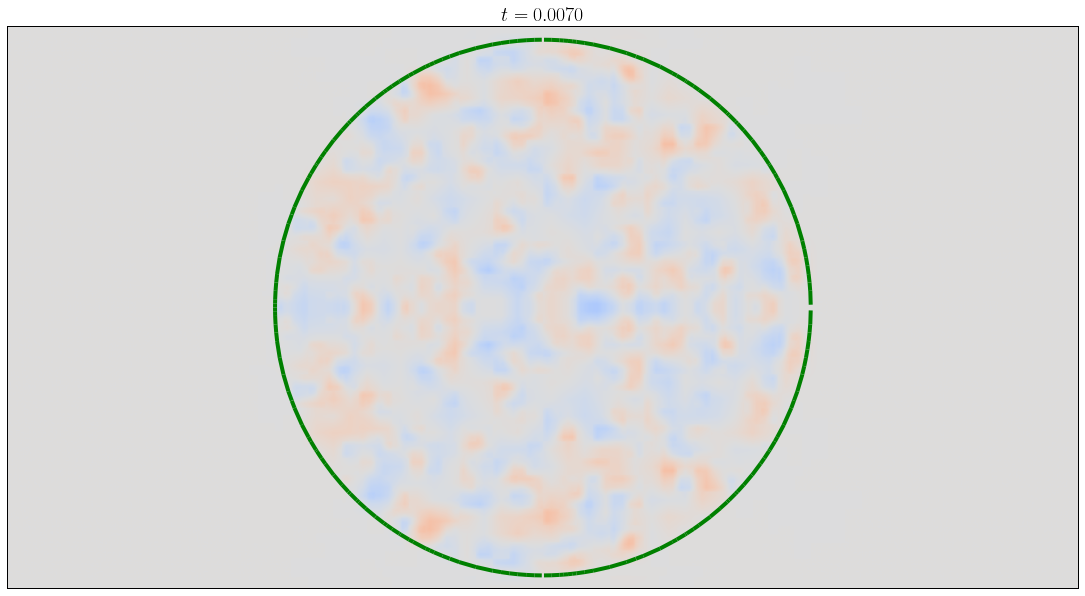

In [3]:
L0, ny = 4e0, 512
xmin, xmax, ymin, ymax = -L0/2., L0/2., 0., 1.05
lw = 2
folder = 'Video_v2'
os.makedirs(folder,exist_ok=True)

for ti in range(0, 500):
    t = ti*0.001
    place = f"phaseSeparation_v2/intermediate/snapshot-{t:5.4f}"
    name = f"{folder}/{int(t*1000):08d}.png"
    if not os.path.exists(place):
        print(f"{place} File not found!")
        continue
    elif os.path.exists(name):
        print(f"{name} Image present!")
        continue    
    segs = get_segs(place)
    X, Y, T, nz = get_field_values(place, xmin, xmax, ymin, ymax, ny)
    plot_graphics(t, name, xmin, xmax, ymin, ymax, segs, T)
    print(f"{name} Image created!")
# t = 0.49
# place = f"phaseSeparation/intermediate/snapshot-{t:5.4f}"
# name = f"{folder}/{int(t*1000):08d}.png"
# segs = get_segs(place)
# X, Y, T, nz = get_field_values(place, xmin, xmax, ymin, ymax, ny)

# plot_graphics(t, "test.pdf", xmin, xmax, ymin, ymax, segs, T)

In [4]:
L0, ny = 4e0, 2048
xmin, xmax, ymin, ymax = -L0/2., L0/2., 0., 1.05
lw = 2
# for ti in range(0, 500):
for t in [1e-3]:
    # t = ti*0.01
    place = f"phaseSeparation_v2/intermediate/snapshot-{t:5.4f}"
    name = f"{int(t*1000):08d}_v2.pdf"
    if not os.path.exists(place):
        print(f"{place} File not found!")
        continue
    elif os.path.exists(name):
        print(f"{name} Image present!")
        continue    
    segs = get_segs(place)
    X, Y, T, nz = get_field_values(place, xmin, xmax, ymin, ymax, ny)
    plot_graphics(t, name, xmin, xmax, ymin, ymax, segs, T)
    print(f"{name} Image created!")
# t = 0.49
# place = f"phaseSeparation/intermediate/snapshot-{t:5.4f}"
# name = f"{folder}/{int(t*1000):08d}.png"
# segs = get_segs(place)
# X, Y, T, nz = get_field_values(place, xmin, xmax, ymin, ymax, ny)

# plot_graphics(t, "test.pdf", xmin, xmax, ymin, ymax, segs, T)

00000001_v2.pdf Image created!
